In [1]:
import pickle
from matplotlib import pyplot as plt

In [2]:
stats = pickle.load(open('../../stats', 'rb'))

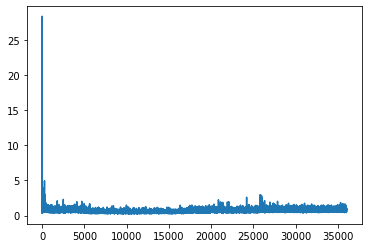

In [7]:
plt.plot(range(len(stats['grad_norm'])), stats['grad_norm'])

In [6]:
stats['grad_norm']

[0.7422260642051697,
 0.8317348957061768,
 1.0506222248077393,
 0.3573428690433502,
 0.87979656457901,
 1.1349890232086182,
 0.6928161382675171,
 0.8978392481803894,
 28.380739212036133,
 1.6130783557891846,
 1.464767575263977,
 1.1940207481384277,
 1.2321268320083618,
 0.503431499004364,
 0.3721708357334137,
 0.3749367296695709,
 0.34240469336509705,
 0.36113929748535156,
 0.35793137550354004,
 0.4421398937702179,
 0.5087264180183411,
 0.5084940195083618,
 0.5485050678253174,
 0.4995063841342926,
 0.8187597990036011,
 0.8750988245010376,
 0.3456863462924957,
 0.48081573843955994,
 0.8308994770050049,
 0.7218005061149597,
 0.6488598585128784,
 1.9767743349075317,
 0.6926867365837097,
 0.5492967367172241,
 0.8703009486198425,
 0.7948158383369446,
 1.0753624439239502,
 1.5411707162857056,
 0.6114029288291931,
 1.236929178237915,
 1.2333226203918457,
 3.450495481491089,
 1.7391763925552368,
 1.3747458457946777,
 0.9003761410713196,
 1.8589837551116943,
 0.6612572073936462,
 1.209371328353